In [1]:
import numpy as np
from scipy.signal import fftconvolve as convolve
import matplotlib.pyplot as plt
import seaborn as sb

# Poisson Extension to Upper Plane
### Heatmaps of the Extension

/var/folders/s9/xdv2y9hs0y7g3zzscy35rz4c0000gn/T/ipykernel_6518/3912491461.py:49: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xticks = np.linspace(0, len(XR) - 1, num_ticks[0], dtype=np.int)
/var/folders/s9/xdv2y9hs0y7g3zzscy35rz4c0000gn/T/ipykernel_6518/3912491461.py:50: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If 

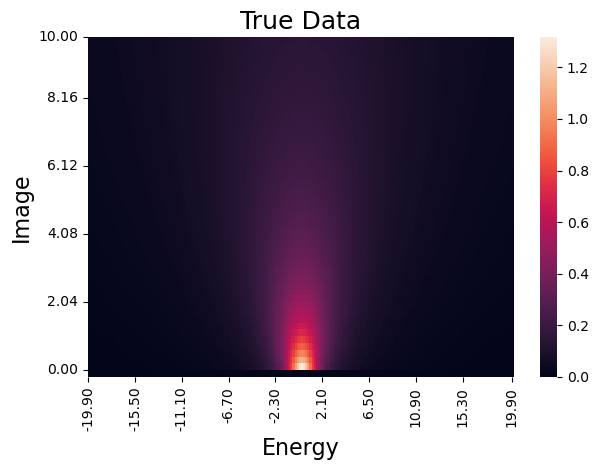

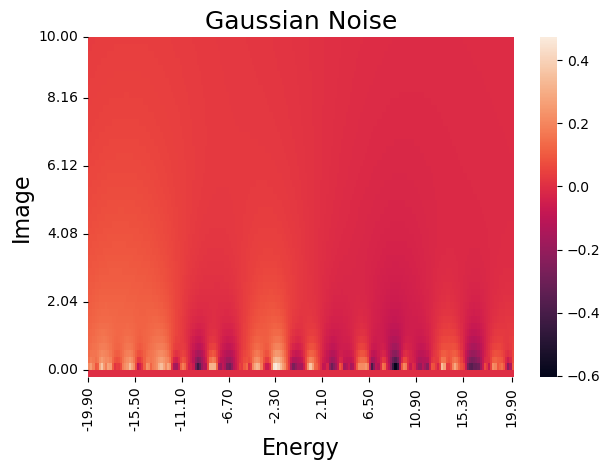

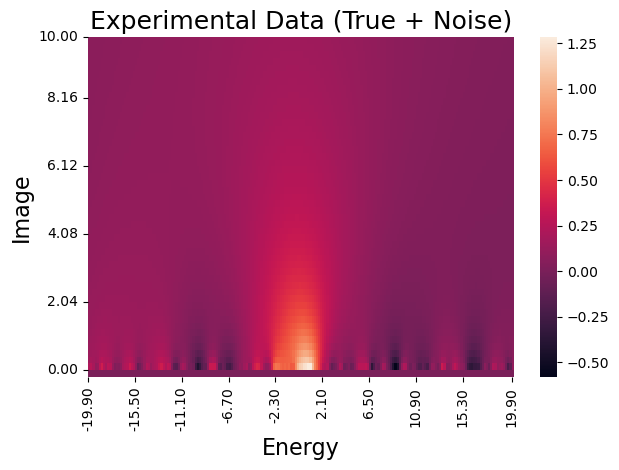

In [2]:

G1 = 1 # Width 1
G2 = 1 # Width 2
std_noise = 0.1 # Noise

N = 10000 # Number of X-points
M = 50    # Number of Y-points
B = 200   # Plotted x-region (number of points)
theta = 0*np.pi/180 # Rotation of the Kernel

X = np.linspace(-1000,1000,N)
Y = np.linspace(0,10,M)
b = int(B/2)

def res_peak(E,G1,G2):
    return G1*G2/(np.pi*(E**2+((G1+G2)/2)**2))

FT  = res_peak(X,G1,G2)
FTC = np.tile(FT.reshape(-1,1), (1,M))

FN  = np.random.normal(0,std_noise,N)
FNC = np.tile(FN.reshape(-1,1), (1,M))

FE = FT + FN
FEC = np.tile(FE.reshape(-1,1), (1,M))

def PoissonKernel(x,y,theta):
    if type(y) != float:
        x = x.reshape(-1,1)
        y = y.reshape(1,-1)
    # return y/(np.pi*(x**2+y**2))
    return (x*np.sin(theta)+y*np.cos(theta))/(np.pi*(x**2+y**2))
Z = X.reshape(-1,1)+1j*Y.reshape(1,-1)
GT = np.real(convolve(FTC,PoissonKernel(X,Y,theta), mode='same', axes=0))
GN = np.real(convolve(FNC,PoissonKernel(X,Y,theta), mode='same', axes=0))
GE = np.real(convolve(FEC,PoissonKernel(X,Y,theta), mode='same', axes=0))

cIdx = int(N/2)
XR = X[cIdx-b:cIdx+b]
YR = np.flip(Y)
GTR = np.flip(GT[cIdx-b:cIdx+b,:].T, axis=0)
GNR = np.flip(GN[cIdx-b:cIdx+b,:].T, axis=0)
GER = np.flip(GE[cIdx-b:cIdx+b,:].T, axis=0)

# Plotting Heatmaps:
settings = {'linewidths':0.0, 'linecolor':'k', 'annot':False}

num_ticks = (10,6)
# the index of the position of yticks
xticks = np.linspace(0, len(XR) - 1, num_ticks[0], dtype=np.int)
yticks = np.linspace(0, len(YR) - 1, num_ticks[1], dtype=np.int)
# the content of labels of these yticks
xticklabels = [f'{XR[idx]:.2f}' for idx in xticks]
yticklabels = [f'{YR[idx]:.2f}' for idx in yticks]

# True cross-section
plt.figure()
ax1 = sb.heatmap(GTR, **settings)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels)
plt.title('True Data', fontsize=18)
plt.xlabel('Energy', fontsize=16)
plt.ylabel('Image', fontsize=16)
plt.tight_layout()
plt.show()

# Just noise:
plt.figure()
ax1 = sb.heatmap(GNR, **settings)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels)
plt.title('Gaussian Noise', fontsize=18)
plt.xlabel('Energy', fontsize=16)
plt.ylabel('Image', fontsize=16)
plt.tight_layout()
plt.show()

# Experimental Data:
plt.figure()
ax1 = sb.heatmap(GER, **settings)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels)
plt.title('Experimental Data (True + Noise)', fontsize=18)
plt.xlabel('Energy', fontsize=16)
plt.ylabel('Image', fontsize=16)
plt.tight_layout()
plt.show()

### Comparison on the Real Part

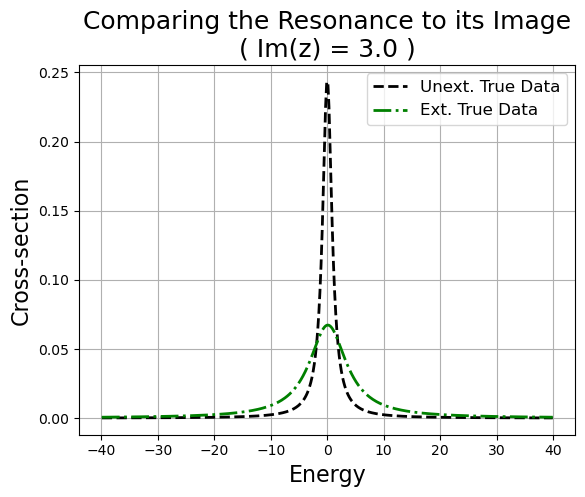

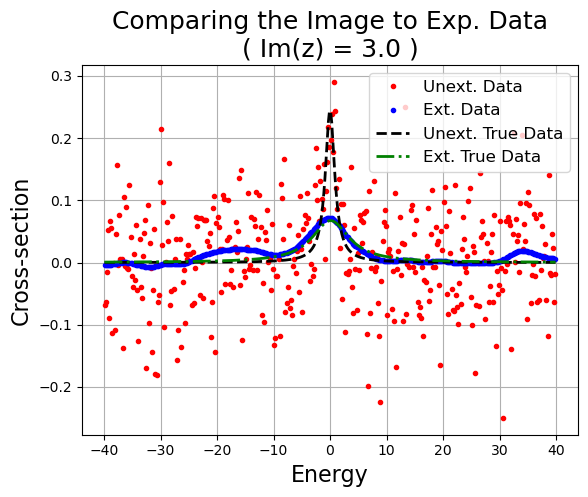

In [3]:
y = 3.0

GE = np.real(convolve(FE,PoissonKernel(X,y,theta), mode='same', axes=0))
GT = np.real(convolve(FT,PoissonKernel(X,y,theta), mode='same', axes=0))

cIdx = int(N/2)
XR = X[cIdx-B:cIdx+B]
FER = FE[cIdx-B:cIdx+B]
FTR = FT[cIdx-B:cIdx+B]
GER = GE[cIdx-B:cIdx+B]
GTR = GT[cIdx-B:cIdx+B]
FRnorm = np.trapz(FER,XR)
FER /= FRnorm
FTR /= FRnorm
GRnorm = np.trapz(GER,XR)
GER /= GRnorm
GTR /= GRnorm

plt.figure()
plt.plot(XR,FTR,'--k', linewidth=2, label='Unext. True Data')
plt.plot(XR,GTR,'-.g', linewidth=2, label='Ext. True Data')
plt.grid()
plt.legend(fontsize=12)
plt.title(f'Comparing the Resonance to its Image\n( Im(z) = {y} )', fontsize=18)
plt.xlabel('Energy', fontsize=16)
plt.ylabel('Cross-section', fontsize=16)
plt.show()

plt.figure()
plt.plot(XR,FER,'.r', label='Unext. Data')
plt.plot(XR,GER,'.b', label='Ext. Data')
plt.plot(XR,FTR,'--k', linewidth=2, label='Unext. True Data')
plt.plot(XR,GTR,'-.g', linewidth=2, label='Ext. True Data')
plt.grid()
plt.legend(fontsize=12)
plt.title(f'Comparing the Image to Exp. Data\n( Im(z) = {y} )', fontsize=18)
plt.xlabel('Energy', fontsize=16)
plt.ylabel('Cross-section', fontsize=16)
plt.show()